Advertising_Sales_Dataset

The data fields in your Advertising dataset:

1.TV: Advertising budget allocated for TV commercials.

2.radio: Advertising budget allocated for radio commercials.

3.newspaper: Advertising budget allocated for newspaper ads.

4.sales: Total sales achieved (target variable).


Importing the important libraries

In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

Loading the dataset 

In [3]:
df = pd.read_csv('Advertising.csv')

df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Size of each data set

In [4]:
df.shape

(200, 5)

Univariate Measures

In [5]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


Check for Null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Data Visualization

<Axes: xlabel='newspaper', ylabel='sales'>

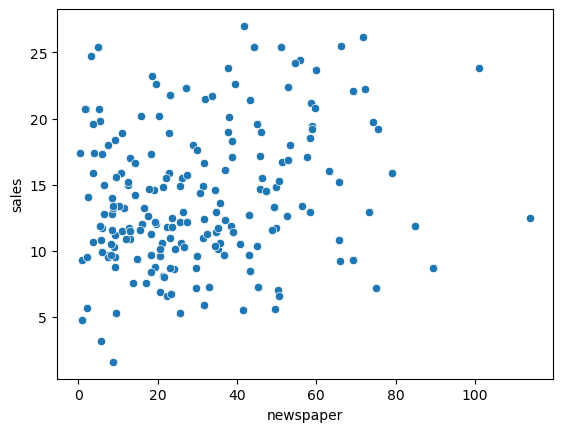

In [8]:
sns.scatterplot(data = df , x='newspaper', y = 'sales')

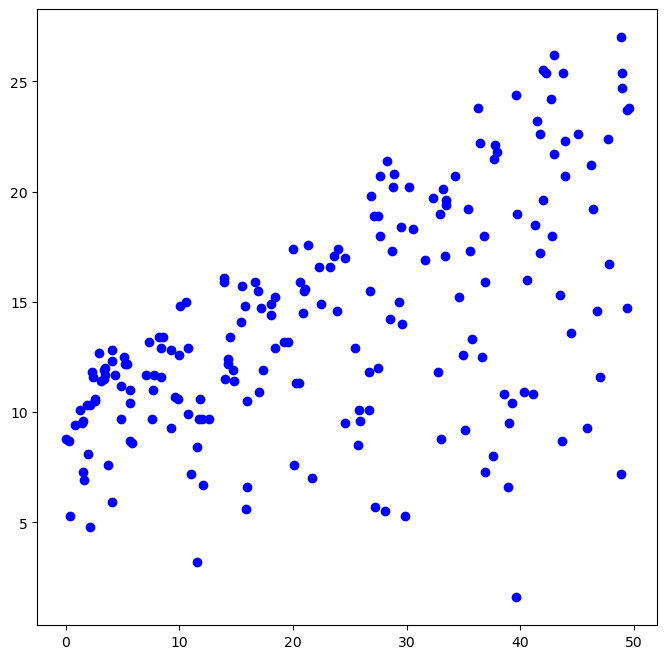

In [9]:
plt.figure(figsize=(8,8))

plt.scatter(df['radio'], df['sales'], c='b')

plt.show()

<Axes: xlabel='TV', ylabel='sales'>

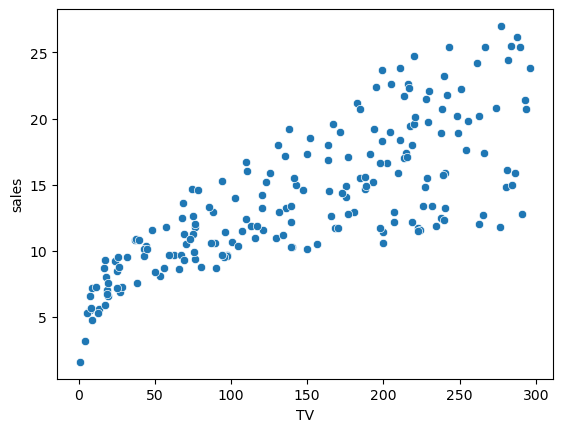

In [10]:
sns.scatterplot(data= df, x='TV', y = 'sales')

Check for correlation

In [11]:
df_correlation = df.corr()
df_correlation

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


Heatmap

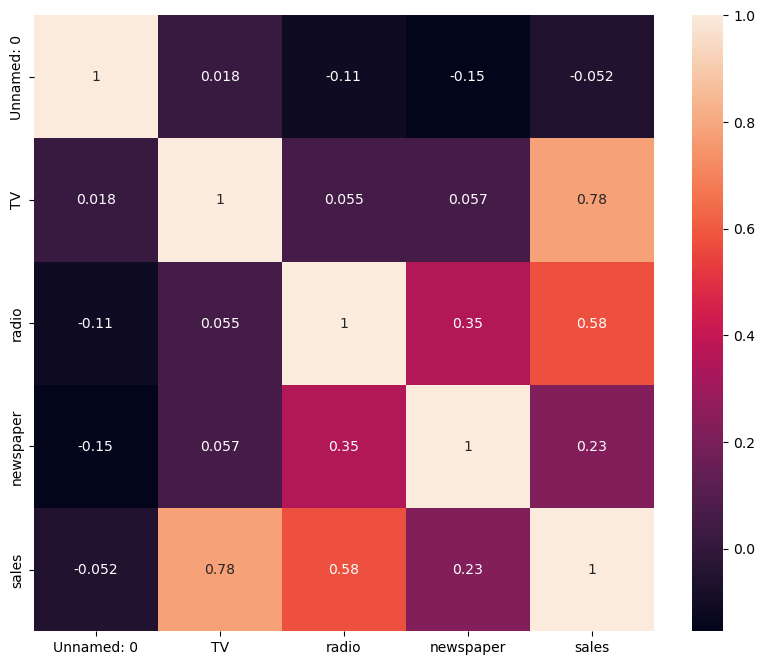

In [12]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df_correlation, annot=True)
plt.show()

Define features and target variable

In [22]:
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

Split the data into training and testing sets

In [23]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize the features

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Define a function to evaluate models

In [25]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2, y_pred

Initialize models

In [26]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "SGD Regressor": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
}


Evaluate each model

In [29]:
results = {}
for name, model in models.items():
    mse, r2, y_pred = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"{name} Predictions: {y_pred}")


Linear Regression Predictions: [16.4080242  20.88988209 21.55384318 10.60850256 22.11237326 13.10559172
 21.05719192  7.46101034 13.60634581 15.15506967  9.04831992  6.65328312
 14.34554487  8.90349333  9.68959028 12.16494386  8.73628397 16.26507258
 10.27759582 18.83109103 19.56036653 13.25103464 12.33620695 21.30695132
  7.82740305  5.80957448 20.75753231 11.98138077  9.18349576  8.5066991
 12.46646769 10.00337695 21.3876709  12.24966368 18.26661538 20.13766267
 14.05514005 20.85411186 11.0174441   4.56899622]
Lasso Regression Predictions: [16.28640705 20.65222378 21.32907961 10.65299391 21.97739207 13.06722962
 20.88517542  7.6616805  13.66769907 15.12432982  9.25016101  6.84500076
 14.19526823  9.08864287  9.81368687 12.20238693  8.83985583 16.25273728
 10.3676506  18.76184717 19.30174378 13.04372496 12.42610315 21.00859974
  8.06634739  6.04559797 20.57547869 12.08951841  9.32047627  8.72200243
 12.53493153 10.13853359 21.11803109 12.13253651 18.14412261 20.04954644
 14.10958581 2

Display results

In [30]:
results_df = pd.DataFrame(results).T
print("\nModel Performance:\n", results_df)


Model Performance:
                         MSE        R2
Linear Regression  3.174097  0.899438
Lasso Regression   3.208877  0.898336
Ridge Regression   3.194156  0.898803
SGD Regressor      3.182227  0.899180


Visualize predictions for Linear Regression

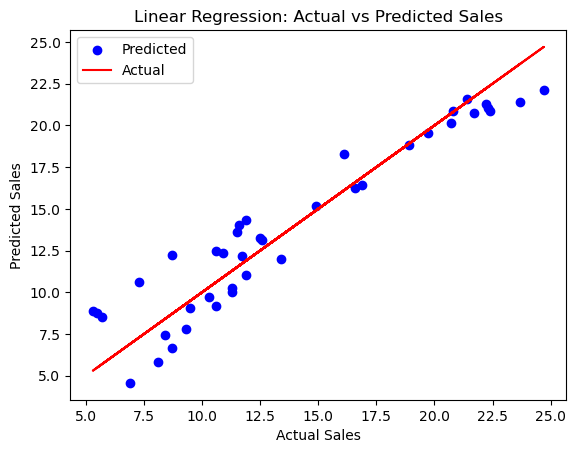

In [31]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_lr = linear_model.predict(X_test_scaled)

plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted')
plt.plot(y_test, y_test, color='red', label='Actual')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs Predicted Sales")
plt.legend()
plt.show()



Feature Importance for Linear Regression

In [32]:
coefficients = pd.Series(linear_model.coef_, index=X.columns)
print("\nFeature Importance:\n", coefficients)


Feature Importance:
 TV           3.764196
radio        2.792307
newspaper    0.055976
dtype: float64


Example visualization of feature importance

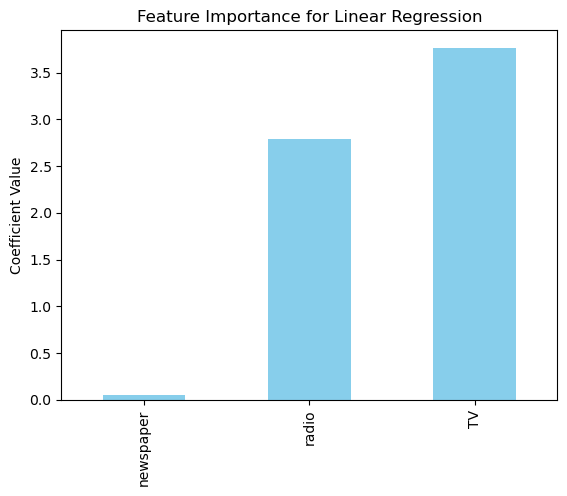

In [34]:
coefficients.sort_values().plot(kind='bar', color='skyblue')
plt.title("Feature Importance for Linear Regression")
plt.ylabel("Coefficient Value")
plt.show()